<a href="https://colab.research.google.com/github/harim061/EDA/blob/main/Harim/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers
- 제거하려는 값이 일정하지 않음 데이터의 오염이나 우리가 지금 당장 신경 쓰지 않는 다른 물리 효과를 나타내는 -> 이상치

(1010,) (1010, 2)


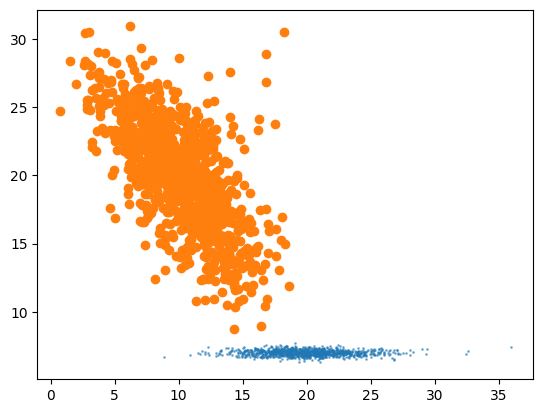

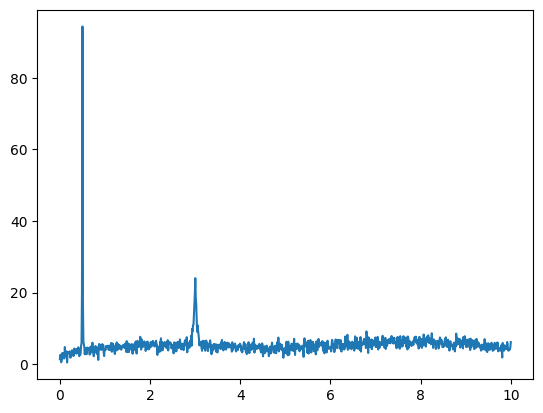

In [4]:
import numpy as np
import matplotlib.pyplot as plt

d1 = np.loadtxt("outlier_1d.txt")
d2 = np.loadtxt("outlier_2d.txt")
d3 = np.loadtxt("outlier_curve.txt")\

print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7,0.2,size=d1.size), s=1,alpha=0.5)
plt.scatter(d2[:,0], d2[:,1])
plt.show();
plt.plot(d3[:,0], d3[:,1])

## Basics
The most basic and most-common way of manually doing outlier pruning on data distributions is to

- 데이터를 분석 함수로써 모델링
- 특정 확룔 이하의 포인트를 찾아 제거 -> 반복

Rejection 5 points
z-score cor 3 corresponds to a prob of 0.27%


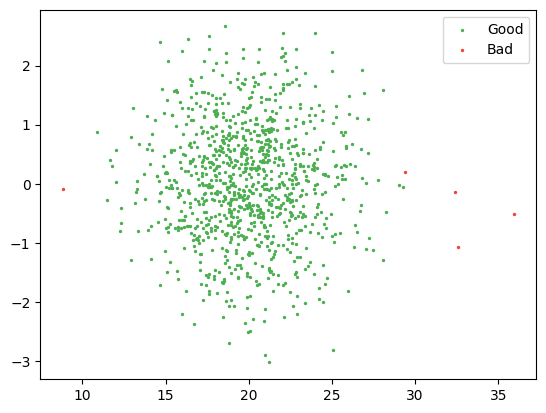

In [12]:
mean, std = np.mean(d1), np.std(d1)
# mean = 평균/ std = 표준편차
z_score = np.abs((d1 - mean)/std)
# z_score : 평균에서 벗어난 표준편차의 수

# 3 이상이면 제거
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score cor 3 corresponds to a prob of { 100 * 2* norm.sf(threshold):0.2f}%")
visual_scatter =np.random.normal(size=d1.size)
plt.scatter(d1[good],visual_scatter[good],s=2,label="Good",color="#4CAF50")
plt.scatter(d1[~good],visual_scatter[~good],s=2,label="Bad",color="#F44336")
plt.legend();

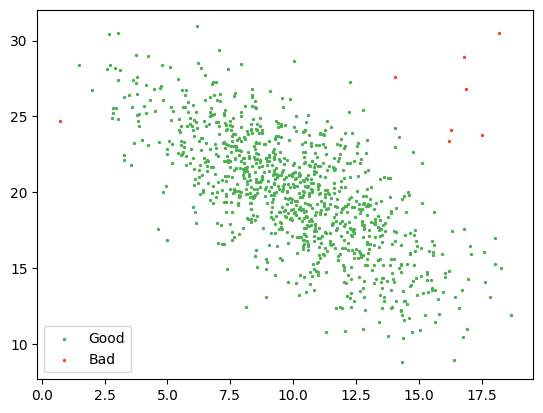

In [14]:
from scipy.stats import multivariate_normal as mn

# d2의 분포를 2차원 가우스로 정량화하는 것
mean, cov = np.mean(d2,axis= 0), np.cov(d2.T)
# d2 포인트를 얻을 확률이 0.01% 보다 크면 good으로 분류
good = mn(mean,cov).pdf(d2) > 0.01/ 100

plt.scatter(d2[good,0],d2[good,1],s=2,label="Good",color="#4CAF50")
plt.scatter(d2[~good,0],d2[~good,1],s=2,label="Bad",color="#F44336")
plt.legend();

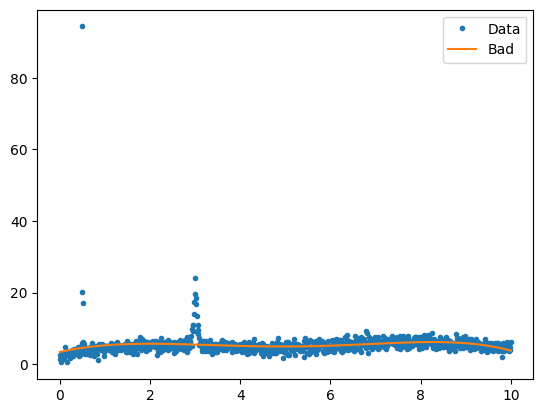

In [19]:
xs, ys = d3.T
# numpy.polyfit 함수는 주어진 데이터에 대해 최소 제곱을 갖는 다항식 피팅 (least squares polynomial fit)을 반환
p = np.polyfit(xs,ys, 5)
# 5차 다항식 됨

ps = np.polyval(p,xs)
plt.plot(xs,ys,".",label='Data')
plt.plot(xs,ps,label="Bad")
plt.legend();

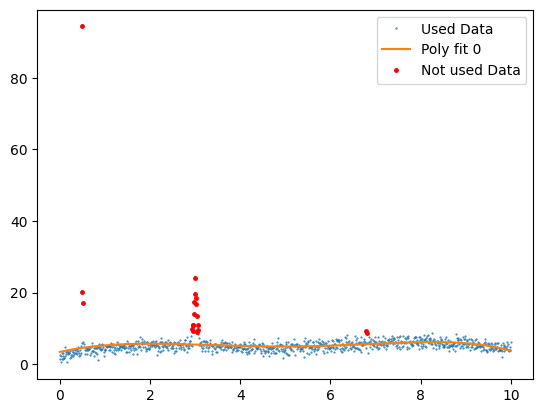

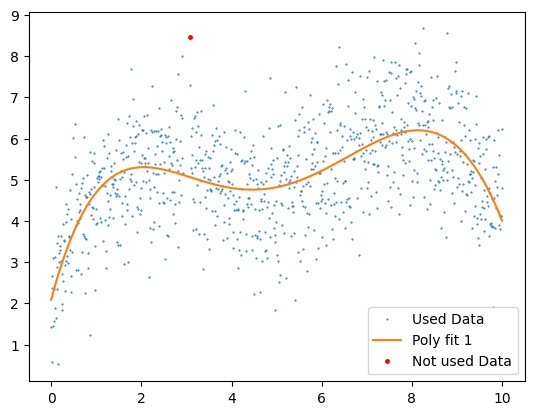

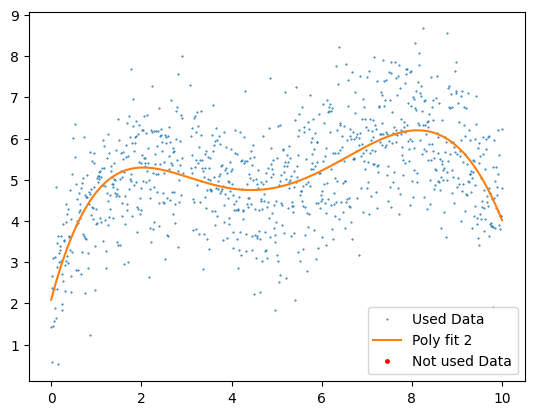

In [20]:
# 1단계 데이터를 복
x, y = xs.copy(), ys.copy()

for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y - ps < 3  # only remove positive outliers

    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]

    plt.plot(x, y, ".", label="Used Data", ms=1)
    plt.plot(x, np.polyval(p, x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used Data", ms=5, c="r")
    plt.legend()
    plt.show()

    if (~good).sum() == 0:
        break

## Automating It
- `sklearn` : 기계 학습 패키지


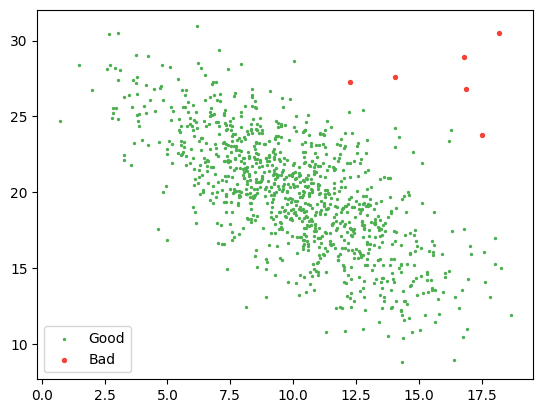

In [23]:
from sklearn.neighbors import LocalOutlierFactor

# 트리 기반으로 구현
# 최근접 이웃을 사용
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)

# fit_predict(d2)로 데이터 표본 전달
# 1 중 한 배열을 반환 -> -1은 이상치
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();